# 特徴量の重要度を調べよう

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import seaborn as sns; sns.set()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300

In [2]:
id_ = "1111_0902"

In [3]:
model = lgb.Booster(model_file=f"./models/lgb_{id_}.txt")

with open(f'./train_pred_yaml/train_pred_{id_}.yaml') as file:
    yml = yaml.safe_load(file)
features = yml["features"]

In [4]:
cols = features
f_importance = np.array(model.feature_importance())
f_importance = f_importance / np.sum(f_importance)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=True)

In [5]:
df_importance

,feature,importance
8,event_name_2,0.000261
38,event_type_1_Religious,0.000415
39,event_type_1_Sporting,0.000472
55,THUND,0.000540
54,SNOW,0.000705
52,FOG,0.000840
58,BAD,0.000929
19,dept_id_HOUSEHOLD_2,0.000947
56,BAD_PREV,0.000955
36,event_type_1_Cultural,0.001096


<AxesSubplot:xlabel='importance', ylabel='feature'>

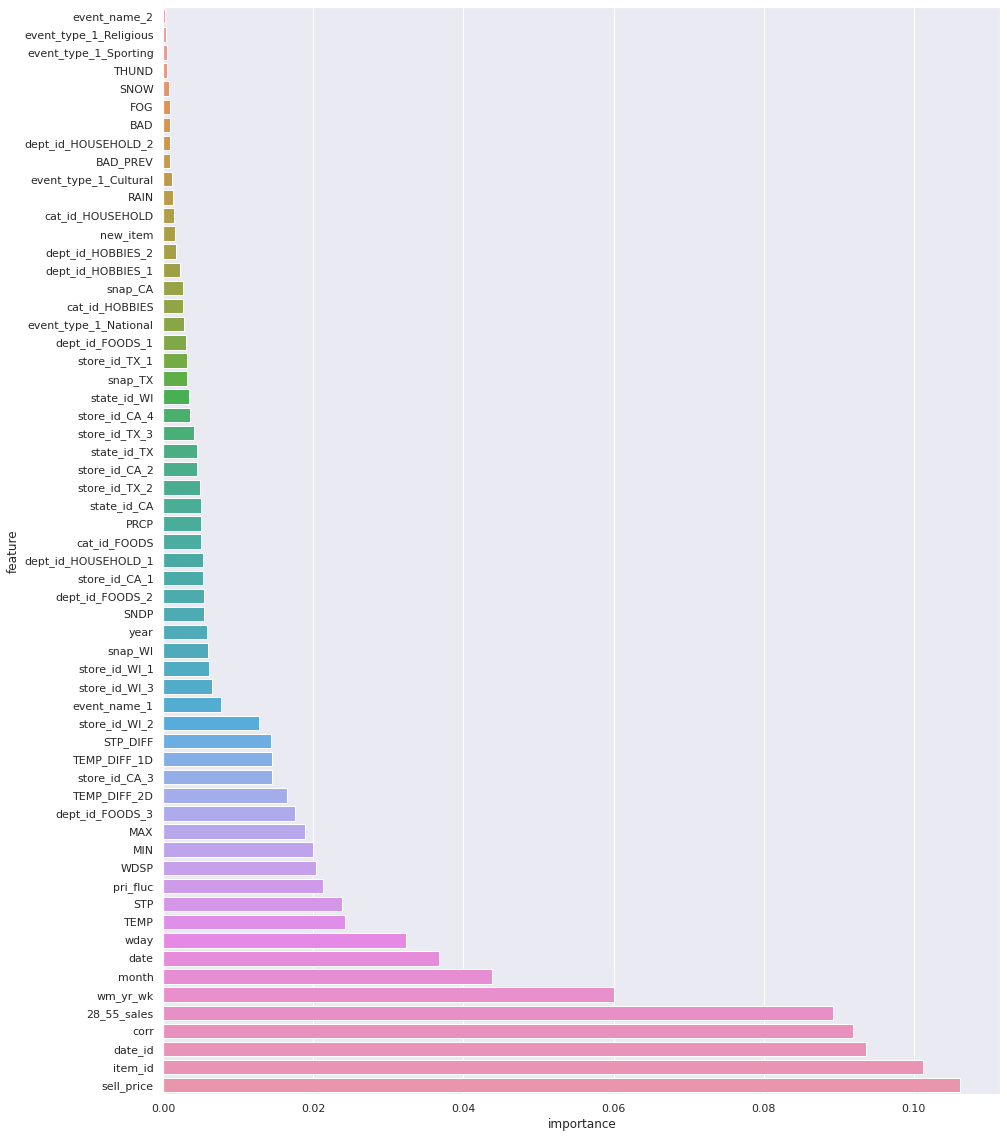

In [11]:
plt.figure(figsize=(15, 20))
sns.barplot(x="importance",y="feature", data=df_importance)

<AxesSubplot:xlabel='importance', ylabel='feature'>

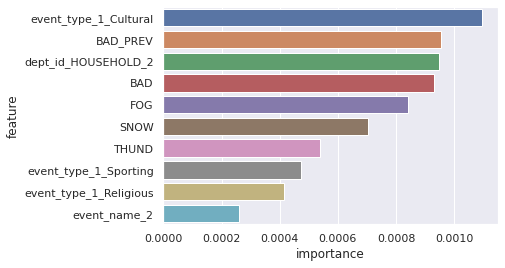

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x="importance",y="feature", data=df_importance.iloc[::-1][-10:])

<AxesSubplot:xlabel='importance', ylabel='feature'>

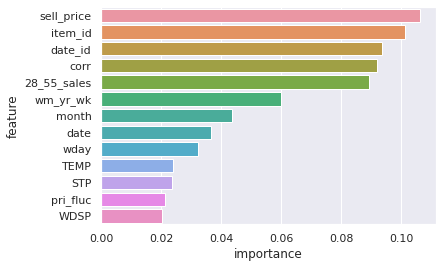

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(x="importance",y="feature", data=df_importance.iloc[::-1][:13])